# APIs
This week we'll be discussing how to get and process data from the web with Application Programming Interfaces.

In [ ]:
# This is old
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
from bs4 import BeautifulSoup

# These are new
# import tweepy

# Load secret keys
with open('api_keys.json') as f:
    api_keys = json.loads(f.read())

## Example 1: Bitcoin
In this example, we'll go through the process of manually querying a Bitcoin API

* You can find the API documentation [here](https://blockchain.info/api)

In [ ]:
# Getting exchange rates
# (A simple API with no necessary parameters)
r = requests.get('https://blockchain.info/ticker')
print('status code: ' + str(r.status_code))
r.json()

In [ ]:
# A more complicated API request
# We can use a parameters dictionary to specify 'arguments' to the API
params = {
    'timespan': '1years',
    'rollingAverage': '1days'
}
r = requests.get('https://api.blockchain.info/charts/market-price', params=params)
print(r.url)
data = r.json()
data

In [ ]:
x_values = [datetime.fromtimestamp(t['x']) for t in data['values']]
y_values = [t['y'] for t in data['values']]

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
fig.autofmt_xdate()

## Example 2: Dictionary API (with API key)
* You can read about the DictionaryAPI [here](http://www.dictionaryapi.com/)

In [ ]:
# We can write a simple API wrapper function to make using the API easier in the future
def word_definitions(word):
    # Here we'll load in our api key
    params = {
        'key': api_keys['dictionary_api_key']
    }
    # Constructing the full URL
    url = 'http://www.dictionaryapi.com/api/v1/references/collegiate/xml/' + word
    
    # Passing parameters into the request and executing it
    r = requests.get(url, params=params)
    
    # Using BeautifulSoup to parse the XML response (ew, XML...)
    soup = BeautifulSoup(r.text, 'xml')
    
    # Scrape defns from the response
    defs = []
    for e in soup.find_all('entry'):
        defs.append(e.find('dt').text)
    return defs

print("Soup:")
print('\n'.join(word_definitions('soup')))

print("\nDank:") 
print('\n'.join(word_definitions('dank')))


## Example 3: Twitter with Tweepy
In this example, we'll show an example of accessing an API with a Python wrapper.

* You can read the Tweepy documentation [here](https://tweepy.readthedocs.io/)
* Get an API key by making an app [here](https://apps.twitter.com/)

In [ ]:
# Load API keys
consumer_key = api_keys['consumer_key']
consumer_secret = api_keys['consumer_secret']
access_token = api_keys['access_token']
access_token_secret = api_keys['access_token_secret']

# Authenticate Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# Do magic
elon = api.get_user('elonmusk')
print('elon is followed by: ' + str(elon.followers_count))
print('elon follows: ' + str(elon.friends_count))

In [ ]:
elon_tweets = api.user_timeline('elonmusk', count=10)
for t in elon_tweets:
    print(t.text + '\n')
    

In [ ]:
# We can also send data to Twitter using Tweepy
tweet = api.update_status("I'm teaching a lecture on APIs. Here's a tweet.")
print(tweet.id)
print(tweet.text)
print(tweet.created_at)


In [ ]:
# Streaming tweets is a great way of capturing lots of data
# (You can get around the limits of Twitter searching)

# Step 1) We need to create a class that will handle when we get new Tweets
class MyStreamListener(tweepy.StreamListener):
    
    # This method will be called when new tweets come in
    def on_status(self, status):
        print(status.text)

# Step 2) We need to setup a stream and tell Tweepy to send Tweets to our listener
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

# Step 3) Turn on the Tweet Stream and track a particular phrase.
myStream.filter(track=[u'pizza'], async=False)
        

# Challenges!
**NOTE:** This week's challenges aren't too difficult to implement, but it may be difficult to understand _how_ to implement them. This is intentional. A very important skill in working with APIs is learning how to read and understand the documentation that is provided with them. These challenges will try to help you develope that skillset.

### Challenge 1: Bitcoin Price over time
Write a function that queries the Blockchain API (Example 1) and graphs the USD Market Price of Bitcoin over the last year.
It may be helpful to look at the [Blockchain Charts API documentation](https://blockchain.info/api/charts_api)

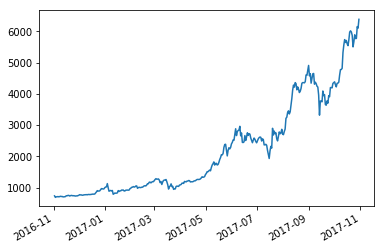

In [20]:
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
from bs4 import BeautifulSoup

def bitcoin_price():
    params = {
        'timespan': '1years',
        'rollingAverage': '1days'
    }
    
    r = requests.get('https://api.blockchain.info/charts/market-price', params=params)
    
    data = r.json()
    
    x_values = [datetime.fromtimestamp(i['x']) for i in data['values']]
    y_values = [j['y'] for j in data['values']]

    fig, ax = plt.subplots()
    ax.plot(x_values, y_values)
    fig.autofmt_xdate()
    
bitcoin_price()
    

### Challenge 2: Creator of Liked Tweets
Given a user, write a function that will return a list of the users that wrote the last 100 tweets that the input user has liked.

**Note:** You'll need a set of Twitter credentials to complete this challenge. (Just make a throwaway account, and create an app at https://apps.twitter.com/ to get your set of API credentials)


In [21]:
import requests
import json
from datetime import datetime
from bs4 import BeautifulSoup
import tweepy

def liked_tweet_creators(user):
    auth = tweepy.OAuthHandler('1X5fCqPl7yVvYxQjQJwkvavFD', 'NXbTDPP3HxlXOL5dWdCegEP09odLAkxUWlyRvZqXxtAtdX597G')
    auth.set_access_token('925495606931546112-mn3Hda41LsZhbYAKJtddL7TulRKucuj', 'lvCFqSLv5YvOGzCINH6JZ5cBI1CEkPKrRioBn5Iuec3Tt')
    
    api = tweepy.API(auth)
    
    listOfFavs = []
    
    for status in tweepy.Cursor(api.favorites, id = user).items(100):
        listOfFavs.append(status.author.screen_name)

    # setOfFavs = set(listOfFavs)
    
    # listOfFavs = list(setOfFavs)
    return listOfFavs
        
print(liked_tweet_creators('elonmusk'))
print(liked_tweet_creators('kennethreitz')) # Author of requests
print(liked_tweet_creators('mitsuhiko')) # Author of Flask

['TheOnion', 'WorldAndScience', 'SpaceX', 'Gizmodo', 'WorldAndScience', 'juliojaimezz', 'WorldAndScience', 'atlasobscura', 'JustinRoiland', 'verge', 'WorldAndScience', 'elonmusk', 'TheOnion', 'WorldAndScience', 'Lakers', 'andrewbogut', 'HistoryInPics', 'Kotaku', 'WorldAndScience', 'WorldAndScience', 'SpaceX', 'OpenAI', 'WorldAndScience', 'Space_Station', 'WorldAndScience', 'ziggyfro', 'Hypothetical_E', 'Astro_Sabot', 'WorldAndScience', 'WorldAndScience', 'A_Mar11Gutie', 'HistoryInPics', 'BD_Makerspace', 'katebevan', 'WorldAndScience', 'WorldAndScience', 'Space_Station', 'verge', 'WorldAndScience', 'DrSteveFawkes', 'guywalters', 'WorldAndScience', 'imgur', 'reed_lewis', 'ajplus', 'TheOnion', 'Wallace_Design', 'ThingsWork', 'TheOnion', 'HistoryInPics', 'DPRK_News', 'AstroKomrade', 'HistoryInPics', 'WorldAndScience', 'WorldAndScience', 'WorldAndScience', 'Tesla', 'mystealthXflies', 'TheOnion', 'WorldAndScience', 'imgur', 'TobiasAHuber', 'sohrab21', 'TheOnion', 'atlasobscura', 'ThingsWork'

### Challenge 3: Stream Saver

Write a function, or set of functions, that takes as an argument a list of search terms and opens a Tweet stream with those search terms. The function should filter out any tweets that are retweets of other tweets, and should filter out any tweets that are `@` replies to other users (the only tweets that we care about are 'original' tweets). As each tweet comes in, append it to a `csv` file specified by `filename` (Note, you have to create this file if it doesn't exist)

For each tweet, save the following information:
* Tweet content (text)
* The user that wrote the tweet
* When the tweet was created
* The 'tweet id' of the tweet

(See Challange 2 for note about Twitter Credentials)

In [ ]:
import requests
import json
from datetime import datetime
from bs4 import BeautifulSoup
import tweepy
import csv

def stream_saver(search_terms, filename):
    class MyStreamListener(tweepy.StreamListener):
    
        def on_status(self, status):
            if status.text[0:2] != "RT" and status.text[0] != "@":
                statusList = [status.text, status.author.screen_name, status.created_at, status.id]
                with open(filename, 'a') as statusCSV:
                    statusWriter = csv.writer(statusCSV, dialect = 'excel')
                    statusWriter.writerow(statusList)
            
    auth = tweepy.OAuthHandler('1X5fCqPl7yVvYxQjQJwkvavFD', 'NXbTDPP3HxlXOL5dWdCegEP09odLAkxUWlyRvZqXxtAtdX597G')
    auth.set_access_token('925495606931546112-mn3Hda41LsZhbYAKJtddL7TulRKucuj', 'lvCFqSLv5YvOGzCINH6JZ5cBI1CEkPKrRioBn5Iuec3Tt')
    
    api = tweepy.API(auth)        

    myStreamListener = MyStreamListener()
    myStream = tweepy.Stream(auth = api.auth, listener = myStreamListener)

    myStream.filter(track = search_terms, async = False)
    
stream_saver(['reddit'], 'test.txt')

## Bonus Challenge (Totally Optional)
#### (Worth a maximum of 2 extra points)

Write a function or set of functions that:
1. Finds the [Twitch]() channel that currently has the most number of live viewers.
2. Enters that Twitch channels chat.
3. Saves the chat to a csv file, saving username, message text, and message time data.

You may use any python API wrappers or helper modules that you may find useful. The Twitch developer page will also be helpful (https://dev.twitch.tv/)